# A notebook for familiarisation with Spec2Vec and MatchMS

In [1]:
import os
from matchms.importing import load_from_mgf

In [2]:
from matchms.filtering import normalize_intensities
from matchms.filtering import reduce_to_number_of_peaks
from matchms.filtering import select_by_mz
from matchms.filtering import require_minimum_number_of_peaks

"""Test typical user workflow to get from mass spectra to spec2vec similarities.
    This test will run a typical workflow example using a small dataset and a
    pretrained word2vec model."""

def apply_filters(s):
    s = normalize_intensities(s)
    s = reduce_to_number_of_peaks(s, n_required=10, ratio_desired=0.5)
    s = select_by_mz(s, mz_from=0, mz_to=1000)
    s = require_minimum_number_of_peaks(s, n_required=10)
    return s


C:\Users\Gosia\anaconda3\envs\fdr-metab\lib\site-packages\matchms\Spectrum.py:137: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = pyplot.figure()


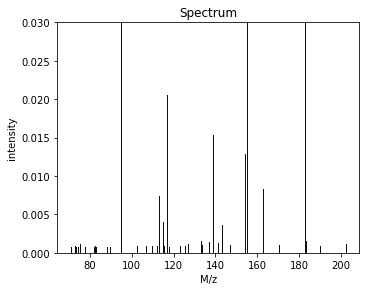

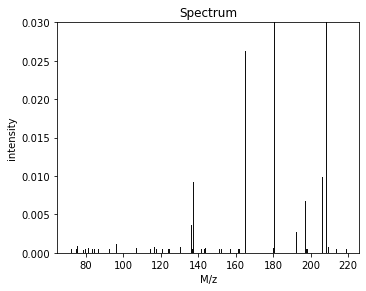

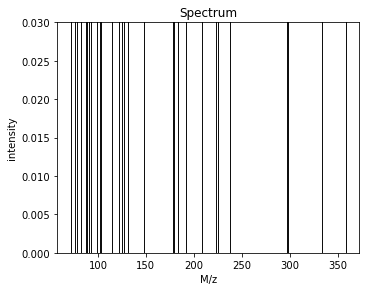

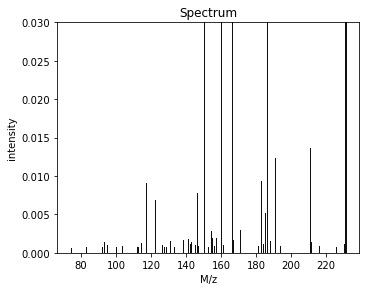

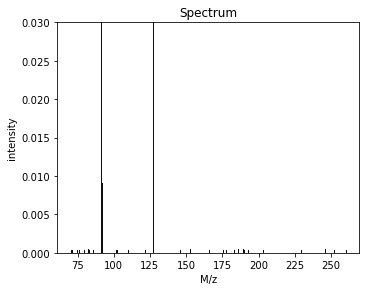

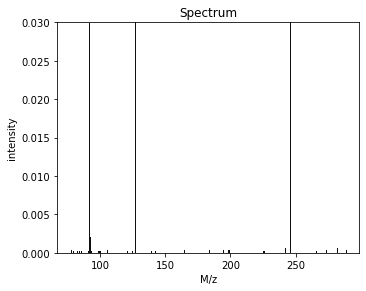

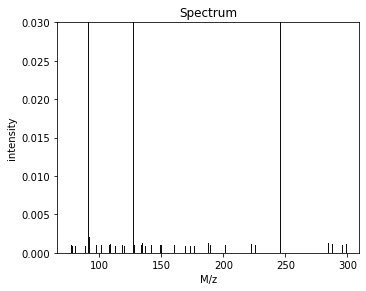

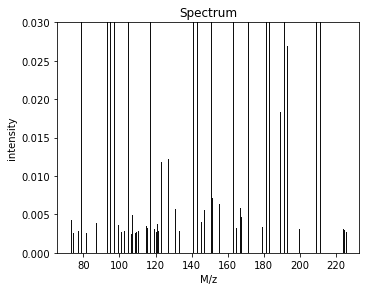

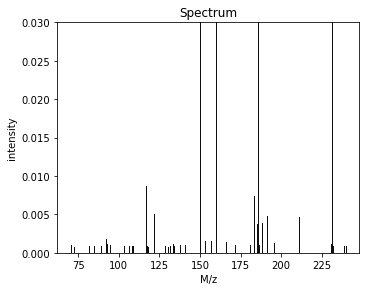

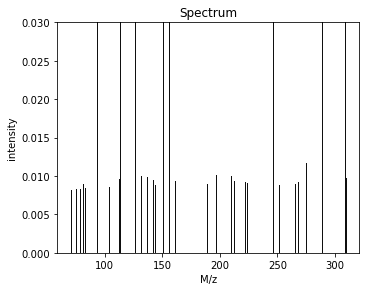

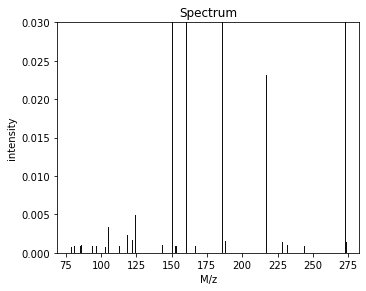

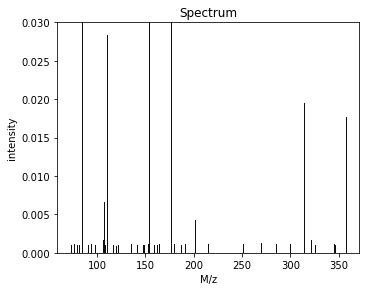

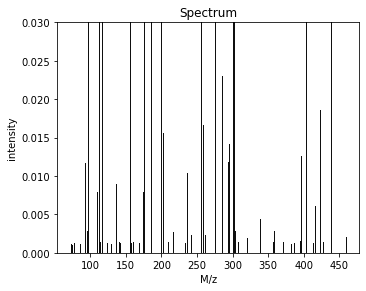

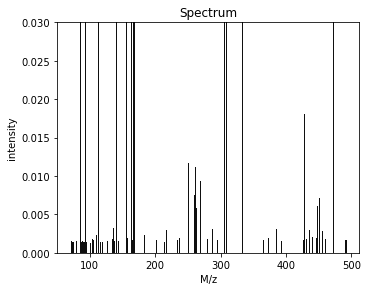

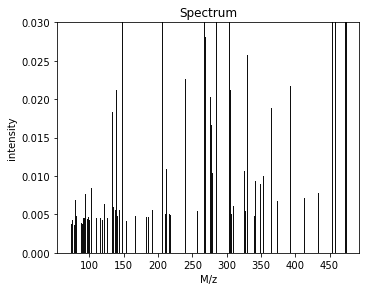

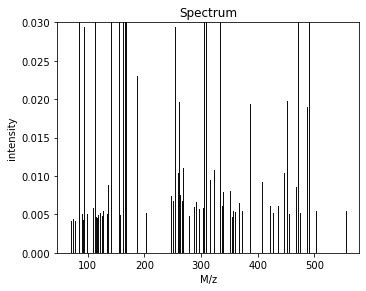

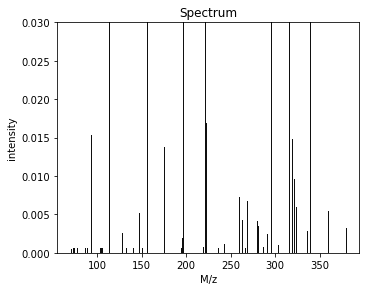

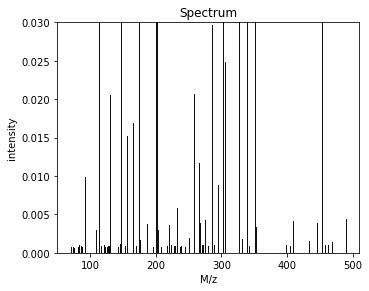

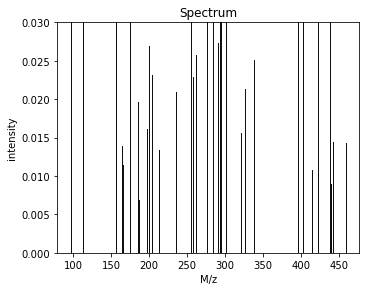

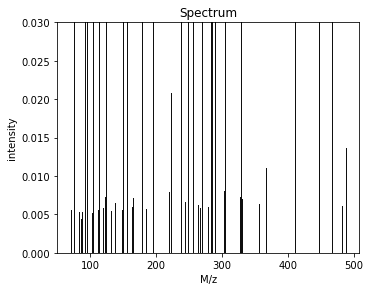

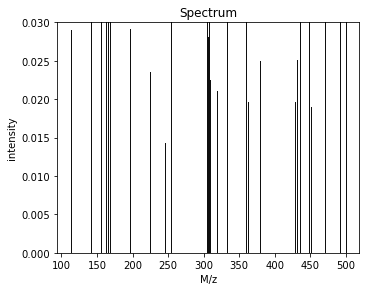

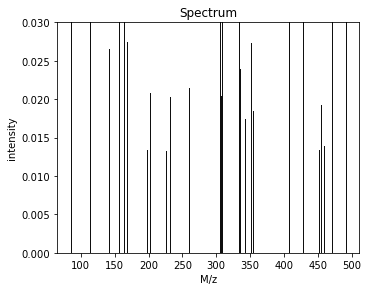

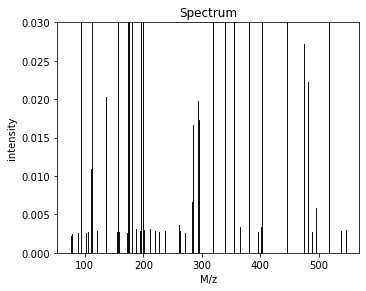

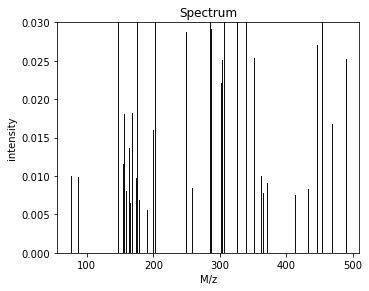

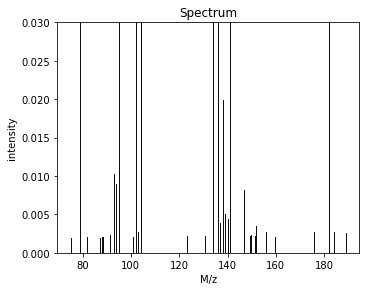

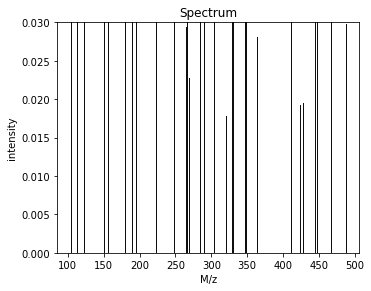

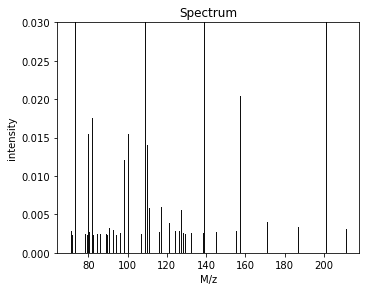

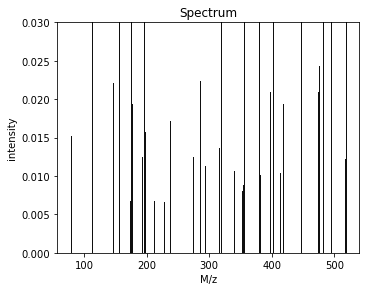

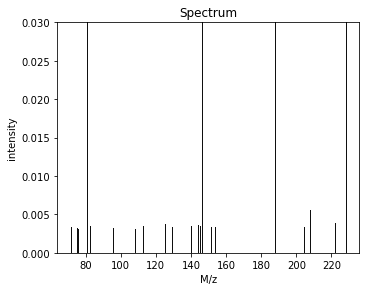

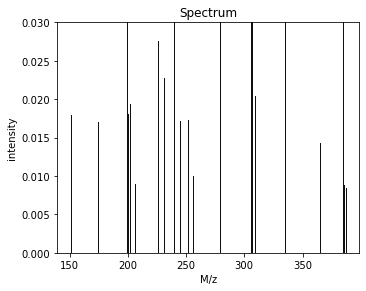

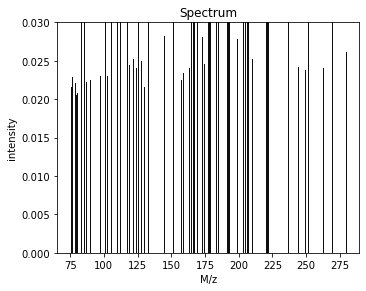

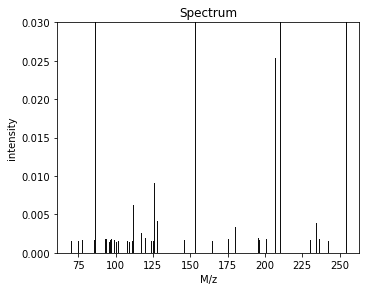

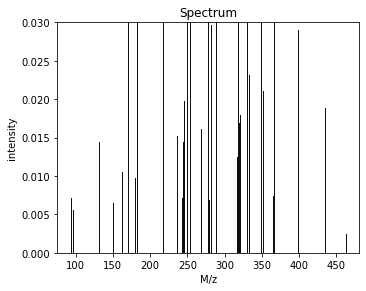

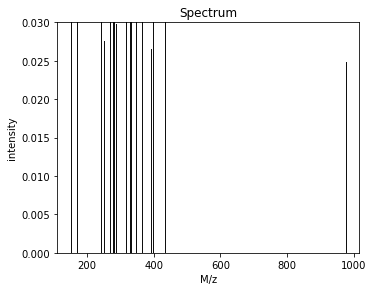

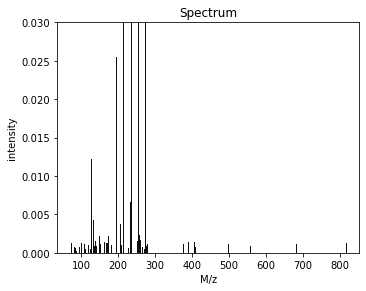

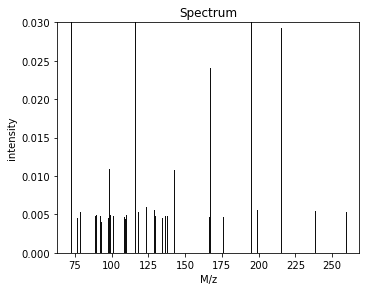

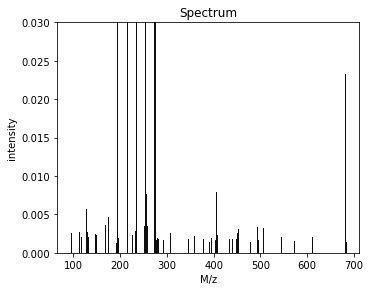

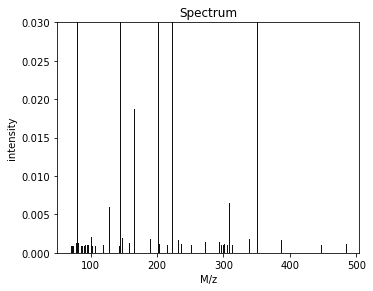

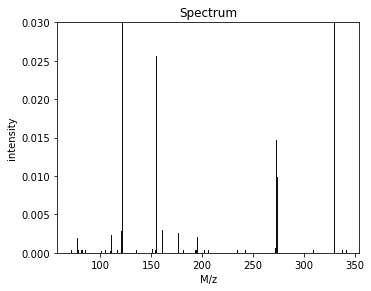

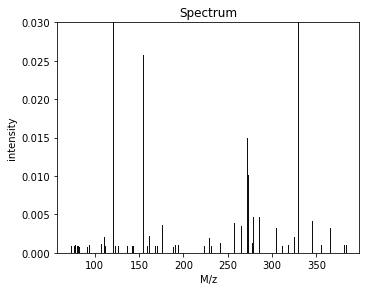

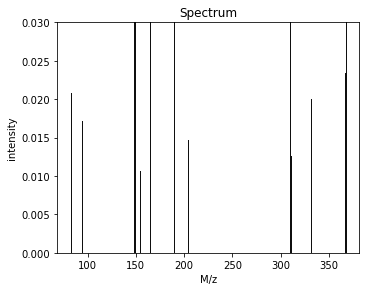

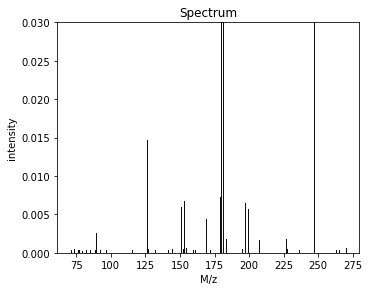

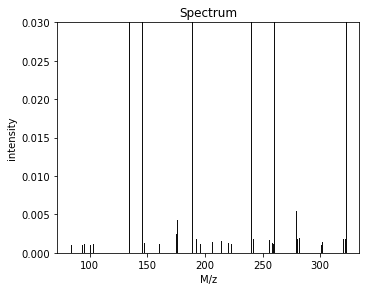

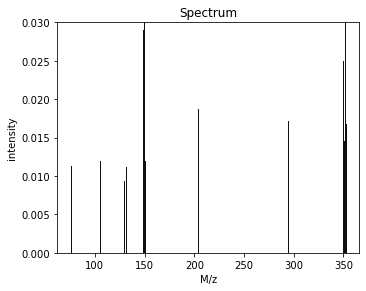

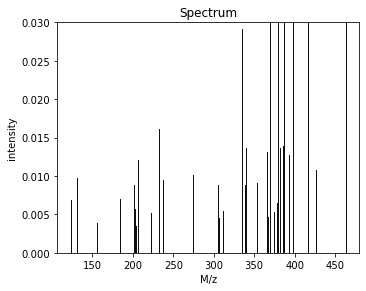

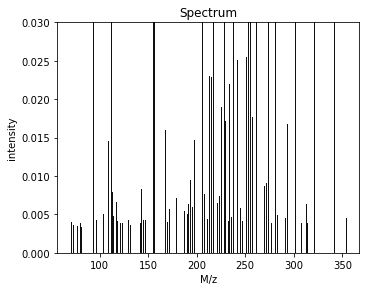

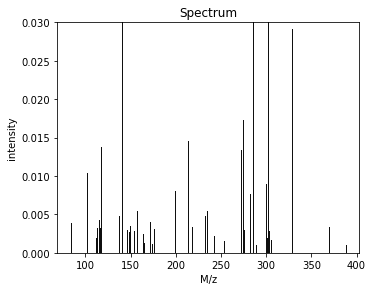

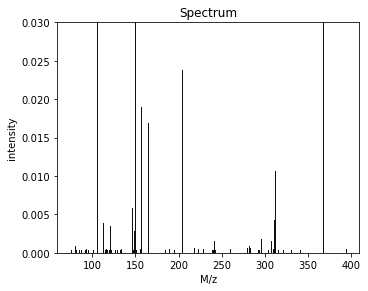

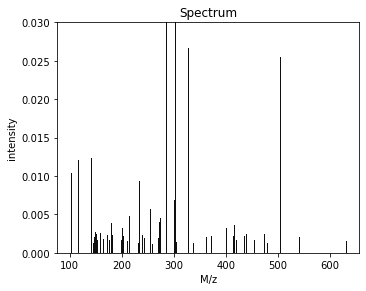

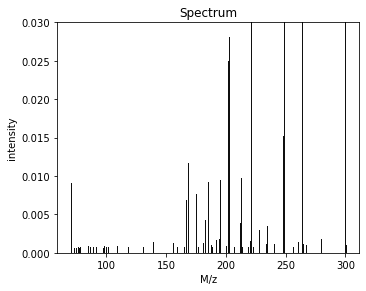

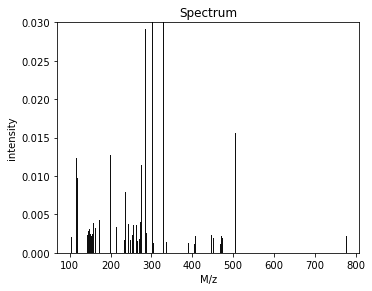

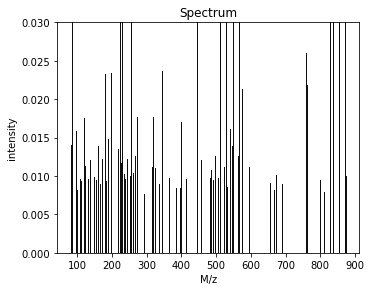

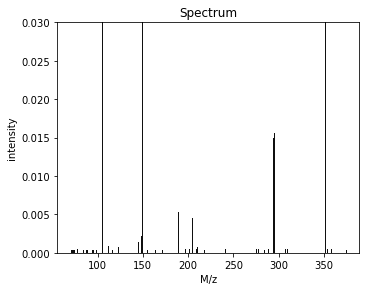

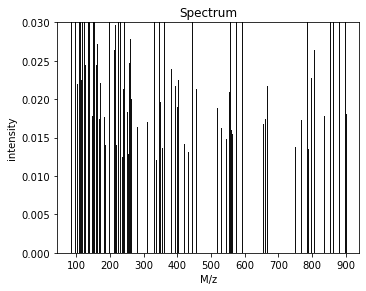

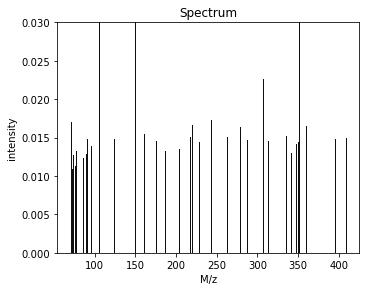

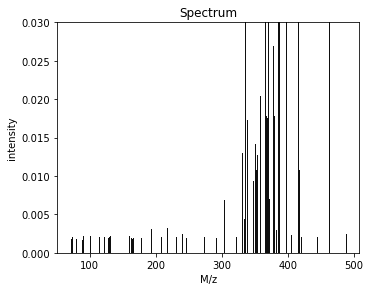

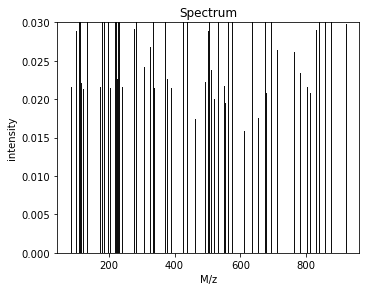

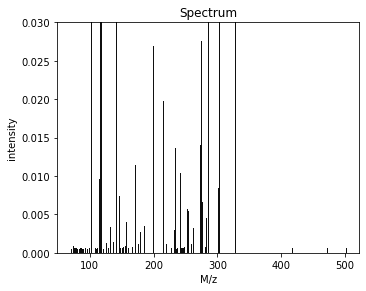

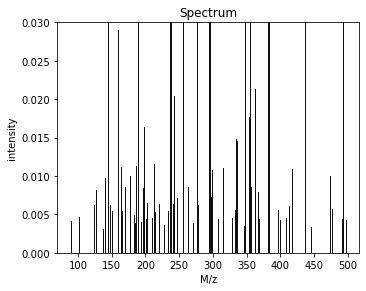

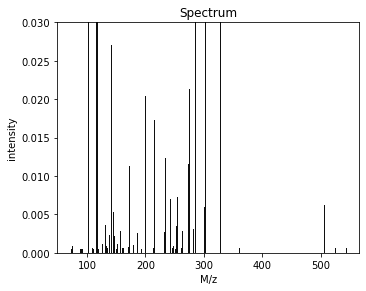

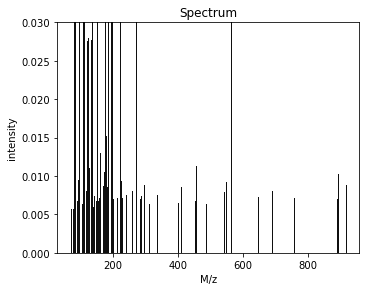

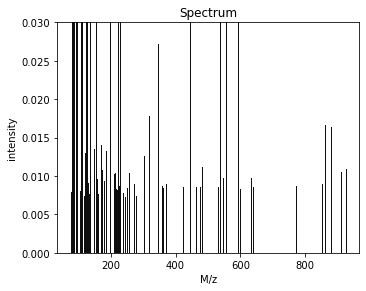

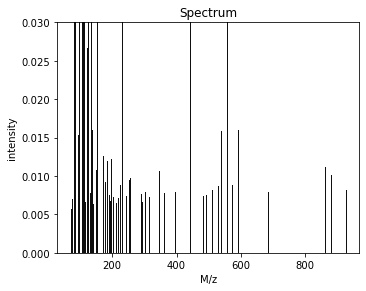

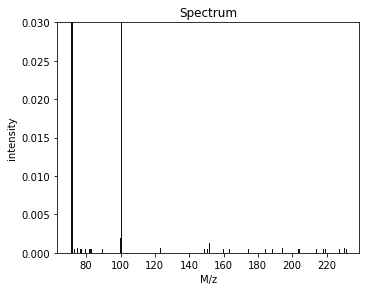

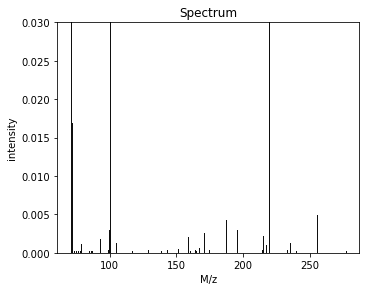

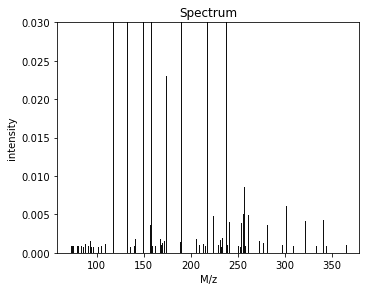

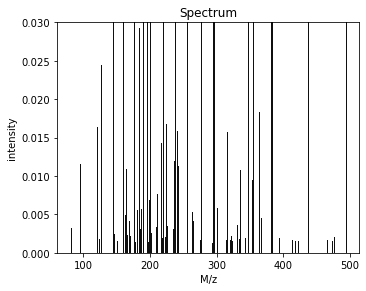

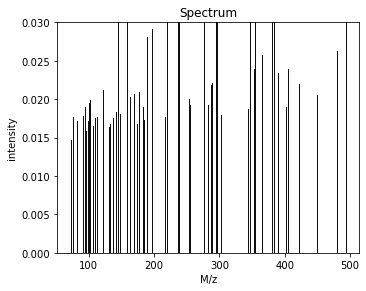

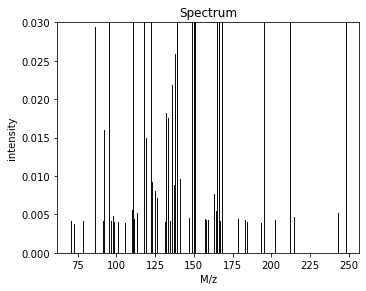

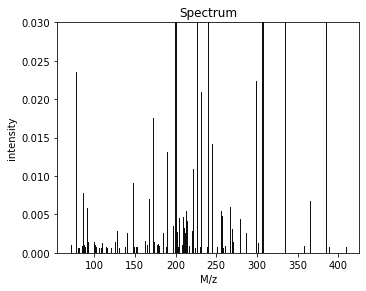

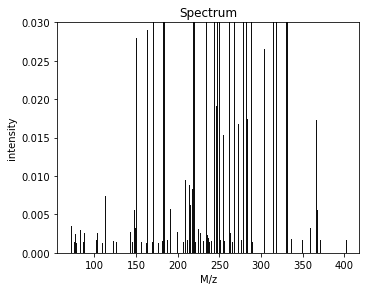

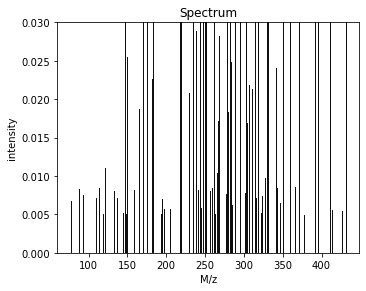

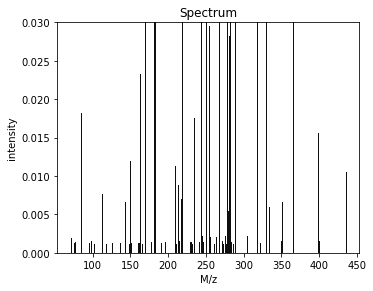

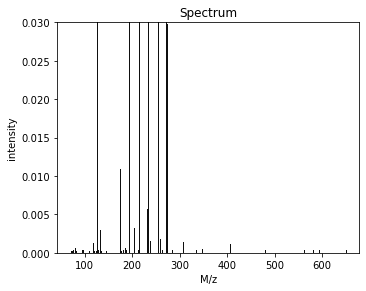

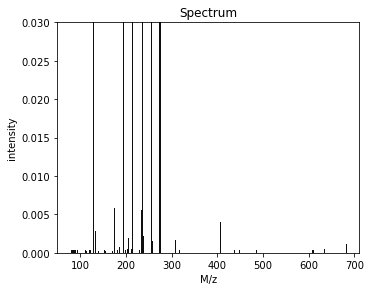

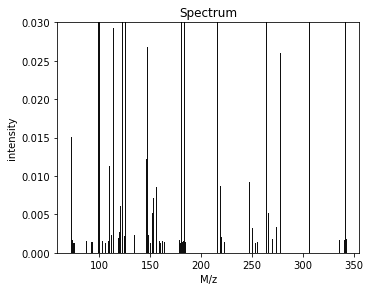

In [11]:
from matchms.importing import load_from_msp
from spec2vec import SpectrumDocument

file = 'pesticides.mgf'

# plotting the spectra
for s in load_from_mgf(file):
    apply_filters(s).plot
    apply_filters(s).plot(intensity_to=0.03)
    

# apply my filters to the data
spectra = [apply_filters(s) for s in load_from_mgf(file)]

# omit spectra that didn't qualify for analysis
spectra = [s for s in spectra if s is not None]

documents = [SpectrumDocument(s) for s in spectra]


In [5]:
from spec2vec import Spec2Vec
from spec2vec.model_building import train_new_word2vec_model

model_file = "reference_spectrums.model"
model = train_new_word2vec_model(documents, filename=model_file, iterations=[10, 20, 30], 
                                workers=2, progress_logger=True)

The value of workers is set from 4 (default) to 2
  Epoch 1 of 30.Change in loss after epoch 1: 18559.12109375
  Epoch 2 of 30.Change in loss after epoch 2: 18567.2421875
  Epoch 3 of 30.Change in loss after epoch 3: 18576.72265625
  Epoch 4 of 30.Change in loss after epoch 4: 18595.6875
  Epoch 5 of 30.Change in loss after epoch 5: 18453.109375
  Epoch 6 of 30.Change in loss after epoch 6: 17604.7265625
  Epoch 7 of 30.Change in loss after epoch 7: 14992.296875
  Epoch 8 of 30.Change in loss after epoch 8: 13308.34375
  Epoch 9 of 30.Change in loss after epoch 9: 12822.15625
  Epoch 10 of 30.Change in loss after epoch 10: 12589.84375
Saving model with name: reference_spectrums_iter_10.model
  Epoch 11 of 30.Change in loss after epoch 11: 12581.765625
  Epoch 12 of 30.Change in loss after epoch 12: 12536.1875
  Epoch 13 of 30.Change in loss after epoch 13: 12492.359375
  Epoch 14 of 30.Change in loss after epoch 14: 12461.4375
  Epoch 15 of 30.Change in loss after epoch 15: 12408.875
 